# This is the pipeline using only libraries

In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
import models as m
import utils as u
import pandas as pd
from surprise.dataset import * 
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
from surprise.model_selection import GridSearchCV
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
raw_data = pd.read_csv('data/data_train.csv', header=0, index_col=0, names=['Id', 'rating'])

dataFrame = u.preprocess(raw_data).reset_index().drop(columns=['Id'])

# Data Analysis

In [3]:
dataFrame.describe()

,rating,user,item
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.892523e+00,5.149863e+03,4.301103e+02
std,1.106656e+00,2.919123e+03,2.402626e+02
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,2.604000e+03,2.160000e+02
50%,4.000000e+00,5.245000e+03,4.500000e+02
75%,5.000000e+00,7.736000e+03,6.400000e+02
max,5.000000e+00,1.000000e+04,8.340000e+02


In [4]:
dataFrame.head()

,rating,user,item
0,4,44,1
1,3,61,1
2,4,67,1
3,3,72,1
4,5,86,1


In [118]:
x = dataFrame.groupby("user").count().rating
x.head()

user
1     20
2    132
3     80
4     20
5    119
Name: rating, dtype: int64

Text(0,0.5,'Number of users')

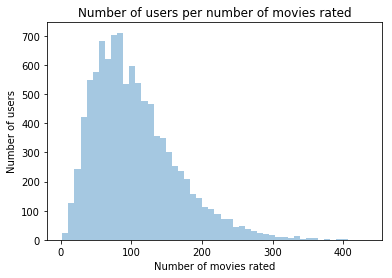

In [125]:
import seaborn as sns 
sns.distplot(x, kde=False);
plt.title('Number of users per number of movies rated')
plt.xlabel('Number of movies rated')
plt.ylabel('Number of users')

In [119]:
y = dataFrame.groupby("item").count().rating
y.head()

item
1     340
2     531
3     792
4    3164
5    1243
Name: rating, dtype: int64

Text(0,0.5,'Number of movie')

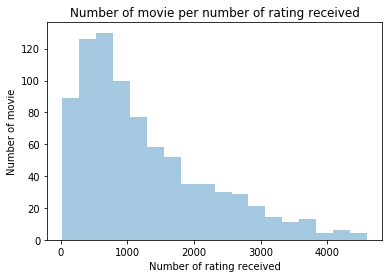

In [127]:
import seaborn as sns 
sns.distplot(y, kde=False);
plt.title('Number of movie per number of rating received')
plt.xlabel('Number of rating received')
plt.ylabel('Number of movie')

Text(0,0.5,'Number of rating')

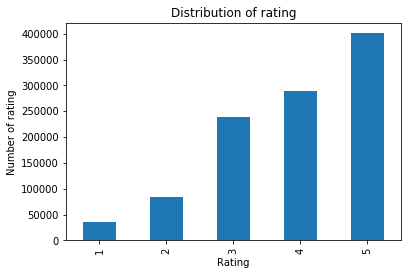

In [122]:
dataFrame.groupby('rating').count().user.plot.bar()
plt.title('Distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Number of rating')

In [ ]:
reader=Reader(rating_scale=(1.0,5.0))
formatted_data= Dataset.load_from_df(dataFrame[['user','item','rating']],reader)

## Baseline

In [ ]:
from surprise import BaselineOnly


algo = BaselineOnly()
cross_validate(algo, formatted_data, verbose=True,cv=5, measures=['RMSE', 'MAE'])

# param_grid = {}
# gs = GridSearchCV(BaselineOnly, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionBase.csv")

## SVD

In [ ]:
from surprise import SVD


algo = SVD(n_factors=1000, n_epochs=20, lr_all=0.005,reg_all=0.02)
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE'])# FOUND RMSE: 1.0276 locally


# param_grid = {'n_factors':[100,120],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)

# # best RMSE score
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionSVD.csv")

## KNN on Movie

In [ ]:
from surprise import KNNBasic


algo =m.movie_knn()
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE']) # FOUND RMSE: 1.0603 locally, 1.133 online

# param_grid = {'n_neighbors':[3,5,9],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)

# # best RMSE score
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionKNNMovie.csv")

## KNN on User

In [ ]:
from surprise import KNNBasic


algo =m.user_knn()
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE'])# RMSE: 1.0420 locally, 1.140 online

# param_grid = {'n_neighbors':[3,5,9],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)

# # best RMSE score
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionKNNUser.csv")

## Slope One

In [ ]:
from surprise import SlopeOne

algo = SlopeOne()
cross_validate(algo, formatted_data, verbose=True,cv=5, measures=['RMSE', 'MAE'])# RMSE: 0.9923 locally, 1.143 online

# param_grid = {}
# gs = GridSearchCV(SlopeOne, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionSlopeOne.csv")

## CoClustering

In [4]:
algo = m.co_clustering()
cross_validate(algo, formatted_data, verbose=True,cv=5, measures=['RMSE', 'MAE'])# RMSE: 1.0038 locally, 1.140 online


Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0047  1.0040  1.0018  1.0041  1.0042  1.0038  0.0010  
MAE (testset)     0.8068  0.8071  0.8056  0.8067  0.8061  0.8065  0.0005  
Fit time          18.62   20.27   20.23   20.19   37.24   23.31   6.99    
Test time         2.09    2.19    1.83    4.71    3.64    2.89    1.11    


{'test_rmse': array([1.00471382, 1.00403069, 1.00179728, 1.00409181, 1.00423735]),
 'test_mae': array([0.80680981, 0.80712163, 0.80560541, 0.80666197, 0.80610796]),
 'fit_time': (18.623739004135132,
  20.274076223373413,
  20.233531713485718,
  20.189019918441772,
  37.243990659713745),
 'test_time': (2.0878589153289795,
  2.1923019886016846,
  1.833517074584961,
  4.712648868560791,
  3.6423721313476562)}

In [5]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionCoClustering.csv")